<img src="logo_ups.jpg" alt="Drawing" style="width: 200px;"/>

# Problème : Traitement d'image
## Contexte

Durant cette séance nous allons nous intéresser à certaines transformations bijectives d’une image. Ce type de transformation déplace les points d’une image d’un endroit à un autre sans en ajouter ni en enlever aucun. De fait ceci revient à
appliquer une permutation sur l’ensemble des points d’une image.
Une propriété remarquable de ces transformations bijectives est qu’elles reviennent toujours au point de départ après
un nombre d’applications plus ou moins important : c’est une conséquence du fait que le groupe des permutations d’un
ensemble fini est d’ordre fini donc tous ses éléments aussi. Par exemple, la transformée par symétrie de l’image par rapport
à un axe vertical passant par son milieu est d’ordre 2, tandis que la transformée par rotation d’un quart de tour est d’ordre
4.

Pour ce TP nous aurons besoin des deux bibliothèques suivantes : `numpy` et `matplotlib.pyplot`

In [4]:
import numpy as np
import matplotlib.pyplot as plt

La seconde bibliothèque contient deux fonctions que nous utiliserons :
* la fonction `plt.imread` prend en argument une chaîne de caractère décrivant le chemin d’accès à un fichier image
au format png et retourne un tableau `numpy`. Ce tableau a même dimension que l’image, et chacune de ses cases
contient un triplet donnant les composantes RGB du pixel correspondant.
* la fonction `plt.imshow` prend en argument un tableau numpy et affiche l’image associée à cette matrice (faire
éventuellement suivre cette commande de l’instruction plt.show() si le mode interactif n’est pas activé).



### Exemple
La ligne suivante convertit l’image `father.png` en une matrice numpy nommée `father`.

In [5]:
father = plt.imread('father.png')

Cette seconde ligne affiche cette matrice-image à l’écran.

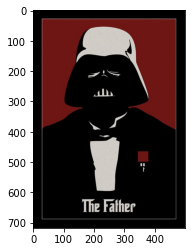

In [6]:
plt.imshow(father)

Le dernier chiffre 3 corresponds au vecteur RGB de taille 3 contenu dans chaque case du tableau. Par exemple, le case à la position `(34,67)` contient le vecteur RGB `[0.43137255, 0.08627451, 0.07843138]`

In [7]:
father[34,67]

array([0.43137255, 0.08627451, 0.07843138], dtype=float32)

## Question 1 : Rotation 
Dans le cas d'une rotation d’un quart de tour, lorsque l'image initiale est rectangulaire, les dimensions de l’image transformée diffèrent de celles de l’image initiale. Pour créer la matrice-image vierge à `q` lignes et
`p` colonnes, vous utiliserez l’instruction `np.zeros((q, p,3))`.

Étant donné un pixel $a$ de coordonnées $a=(x,y)$ dans l’image initiale, ses coordonnées $(x',y')$ dans l’image transformée par une rotation d'un quart de tour vers la droite sont données par :
$$\left\{ \begin{array}{rcl} x' & = & y \\ y'  & = & p−1−x \end{array} \right.$$

<img src="rquart.png" alt="Drawing" style="width: 800px;"/>

Ecrivez une fonction `rot(x,y,p,q)` qui prend entrée les coordonnées d'un pixel (`x`,`y`) et la taille d'une image (`p`,`q`) et renvoie les coordonnées du pixel trandsformé par la rotation d'un quart de tour décrite plus haut.     

In [8]:
def rot(x,y,p,q): 
        return y,p-1-x

A l'aide de la fonction `rot`, écrivez une fonction `rotation(img)` qui prend en entrée une matrice-image `img` et qui renvoie une nouvelle matrice-image transformée par la rotation d’un quart de tour. Les dimensions $p\times q$ de l’image initiale peuvent être calculées par les instructions :
* `p = img.shape[0]`
* `q = img.shape[1]`

Vous testerez votre fonction en faisant apparaître à l’écran le résultat de `rotation(father)`.

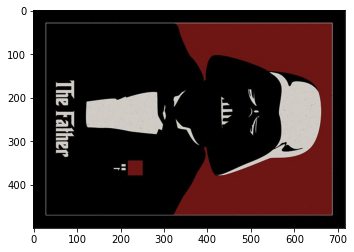

In [9]:
def rotation(img):
    p = img.shape[0]
    q = img.shape[1] 
    img2 = np.zeros((q, p, 3))
    for x in range(p):
        for y in range(q):
            img2[rot(x,y,p,q)] = img[x, y]
    return img2

plt.imshow(rotation(father))

## Question 2 : Aplatissage et découpage. 

Cette transformation « aplatie » l’image, puis la découpe en deux (partie gauche et partie droite) et place la partie droite sous la partie gauche en la faisant tourner de 180°. 

Lors de la phase « d'aplatissage », l’image initiale est découpée en paquets carrés de quatre pixels puis ceux-ci sont entrelacés pour obtenir l’image intermédiaire aplatie :

<img src="aplat.png" alt="Drawing" style="width: 900px;"/>


La moitié gauche est ensuite placé sous la partie droite par une rotation de 180° (soit deux applications successives de la fonction `rotation`). Étant donné un pixel $a$ de coordonnées $a=(x,y)$ dans l’image initiale, ses coordonnées $(x',y')$ dans l’image transformée par la transformation de découpage décrite précédemment est données par :
$$(x',y')=\left\{ \begin{align}
&\left( \left\lfloor \frac{x}{2} \right\rfloor, 2y \right) && \text{si } x \text{ est pair et } 2y<q \\
&\left( p-1-\left\lfloor \frac{x}{2} \right\rfloor, 2q-1-2y \right) && \text{si } x \text{ est pair et } 2y \geq q \\
&\left( \left\lfloor \frac{x}{2} \right\rfloor, 2y+1 \right) && \text{si } x \text{ est impair et } 2y+1<q \\
&\left( p-1-\left\lfloor \frac{x}{2} \right\rfloor, 2q-1-(2y+1) \right) && \text{si } x \text{ est impair et } 2y+1\geq q \\
\end{align} \right.$$

où $\left\lfloor \dfrac{x}{y} \right\rfloor$ désigne en python `x//y` le résultat de la division entière de `x` par `y`.

Ecrivez une fonction `aplatDecoup(x,y,p,q)` qui prend entrée les coordonnées d'un pixel (`x`,`y`) et la taille d'une image (`p`,`q`) et renvoie les coordonnées du pixel trandsformé par la transformation décrite plus haut.      



In [10]:
def aplatDecoup(x,y,p,q): 
    if x % 2 == 0 and 2*y <q :
        return x//2 , 2*y
    elif x % 2 == 0 and 2*y>=q :
        return p-1-x//2, 2*q-1-2*y 
    elif x % 2 != 0 and 2*y <q :
        return x//2, 2*y+1
    else:
        return p-1-x//2, 2*q-1-(2*y+1) 

A l'aide de la fonction `decoup`, ecrivez une fonction `aplatdecoupage(img)` qui prend en entrée une matrice-image `img` et qui renvoie une nouvelle matrice-image transformée par la transformation de découpage. Vous testerez votre fonction en faisant apparaître à l’écran le résultat de `aplatdecoupage(father)`.

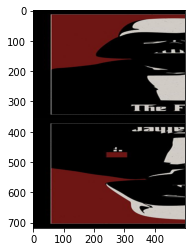

In [11]:
def aplatdecoupage(img):
    p = img.shape[0]
    q = img.shape[1] 
    img2 = np.empty_like(img) 
    for x in range(p):
        for y in range(q):
            img2[aplatDecoup(x,y, p, q)] = img[x, y]
    return img2

plt.imshow(aplatdecoupage(father))


## Question 3 : Période d'un pixel
Le but de cette question est trouver le nombre de fois qu'il faut appliquer une tranformation bijective `f` à une image pour qu'elle revienne à l'identique.  

Ecrivez une fonction `retour_pixel(f,x, y, p, q)` qui prend en entrée :
* les coordonnées (`x`,`y`) d’un pixel 
* la taille (`p`,`q`) de l’image auquel il appartient 

qui retourne le nombre de fois qu'il faut appliquer `f` à (`x`,`y`) pour qu'il revienne à sa place initiale. 

Vous appliquerez votre fonction `retour_pixel` à la rotation d'un quart de tour à l'aplatissage/découpage à l'aide des fonctions `rot` et `aplatDecoup`. Que peut-on en conclure ? 

In [21]:
def retour_pixel(f,x, y, p, q):
    x1, y1 = f(x, y, p, q)
    n=1
    while (x1, y1) != (x, y):
        n += 1
        x1, y1 = f(x1, y1, p, q)
    return n

print(retour_pixel(rot,100, 50, 717, 500))
print(retour_pixel(aplatDecoup,100, 50, 717, 500))


4
21519
